#### LIST COMPREHENSION

* List comprehension is a syntactical construct available in Cypher for creating a list based on existing lists
* It follows the set-builder notation (set comprehension) instead of a map and filter functions


```
RETURN [x in range(0,12)]
```


#### Pattern Comprehension 

* Pattern comprehension is a syntactical construct available in Cypher for creating a list based on matchings of a pattern
* A pattern comprehension will match the specified pattern just like a normal MATCH clause

```
// This query doesn't work for some reason... 
MATCH (ah:AccountHolder) RETURN [(ah) -- (b) WHERE b:BankAccount | b.amount] as amounts
```

### Maps (or dicts as known in Python) 

##### Two types of maps: Literal & Map Projections


#### Literal Map

* Key must be a string
* If returned via HTTP a json object will be returned
* If returned via Java, an object of type Map will be returned map java.util.Map<String,Object> 



```
:params {team:{AccountExecutive: 'Tim', FieldEngineering:[{SalesEngineer:'Dan'},{SalesEngineer:'Alexander'}]}}
UNWIND $team as team RETURN team
```


#### Map Projection

* map projections can be easily created from nodes,realtionships and other map values
* begins with a variable bound to the graph entity to be projected from, and contains a body of comma-seperated map elements, enclosed by { and }
* a map element projects or more key-value pairs to the map projection. These exist four different types of map projection elements

* property selector = projects the property name as the key, and the value from the 'map variable' as the value of the projection.
* variable selector = projects a variable, with the variable name as the key, and the value the variable is pointing to as the value of the projection
* literal entry = this is a key-value pair, with the value being an arbitrary expression key:expression
* all-properties selector - projects all key-value pairs from the map_variable value


```
MATCH (ronald:AccountHolder{fullName:'Ronald Gladysz'}) - [:HAS_BANKACCOUNT] -> (bankaccount:BankAccount) RETURN ronald{.fullName,balances:collect(bankaccount{.balance})}
```


### working with Nulls

#### Intro to Nulls

* null is used to represent missing or undefined values. 
* null means a missing and unknown value

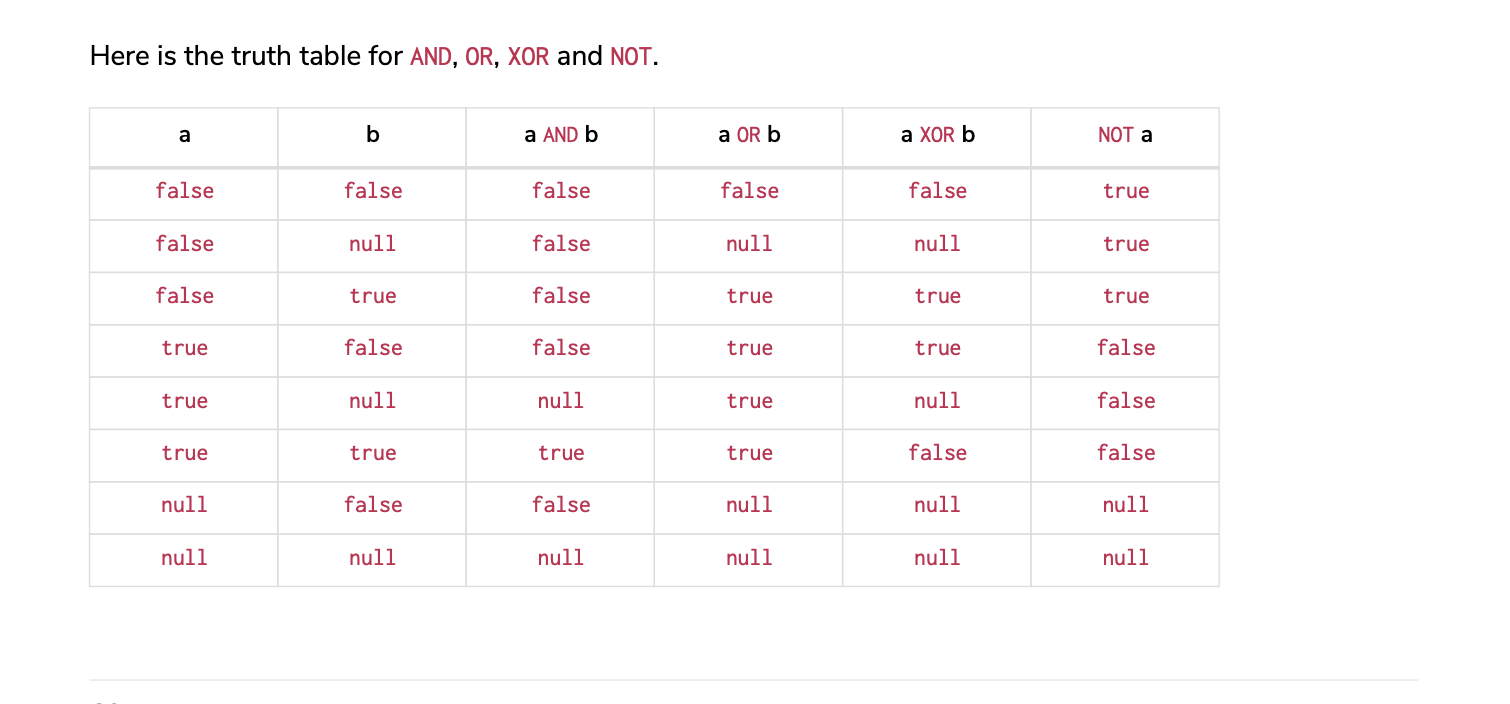

## Clauses


### Reading clauses
* Comprise clauses that read data from the database
1. MATCH
2. OPTIONAL MATCH
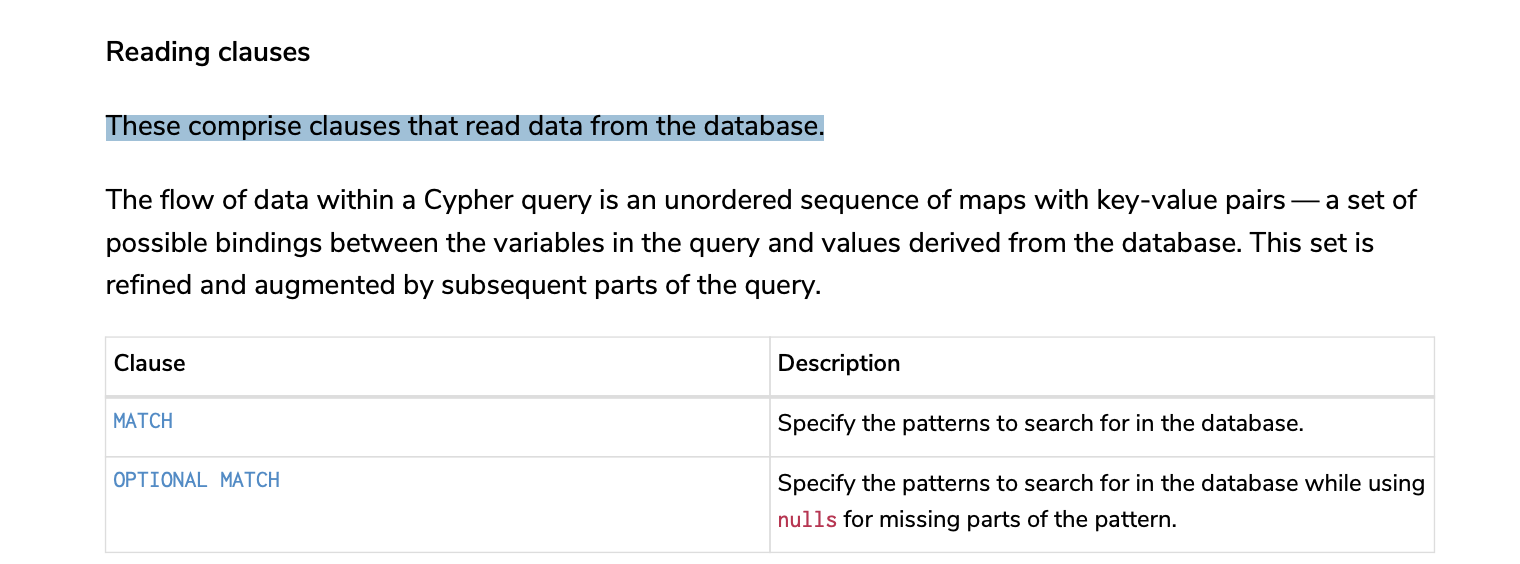


### Projecting clause
* Comprise clauses that define which expressions to return in the result set. The returned expressions may all be aliased AS
1. RETURN
2. WITH
3. UNWIND
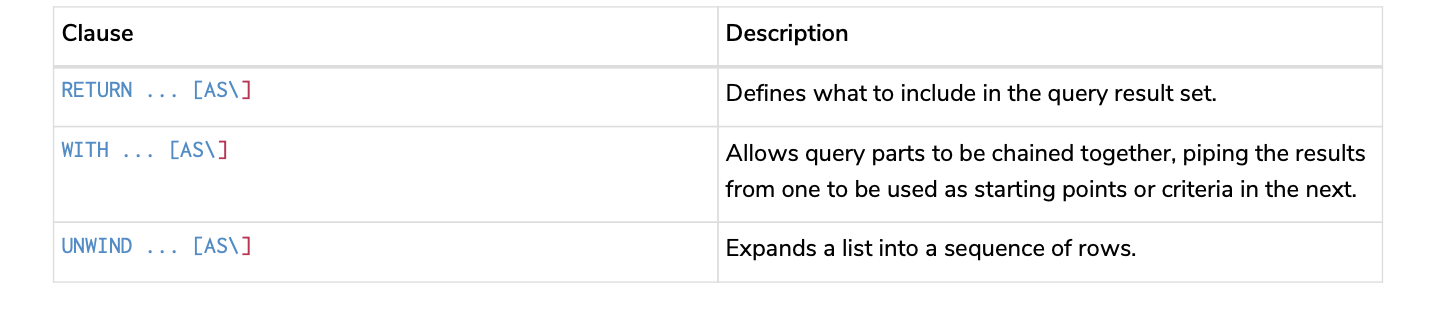


### Reading Sub-clauses
* These comprise sub clauses that must operate as part of a read clause
1. WHERE
2. WHERE EXISTS
3. ORDER BY
4. LIMIT
5. SKIP
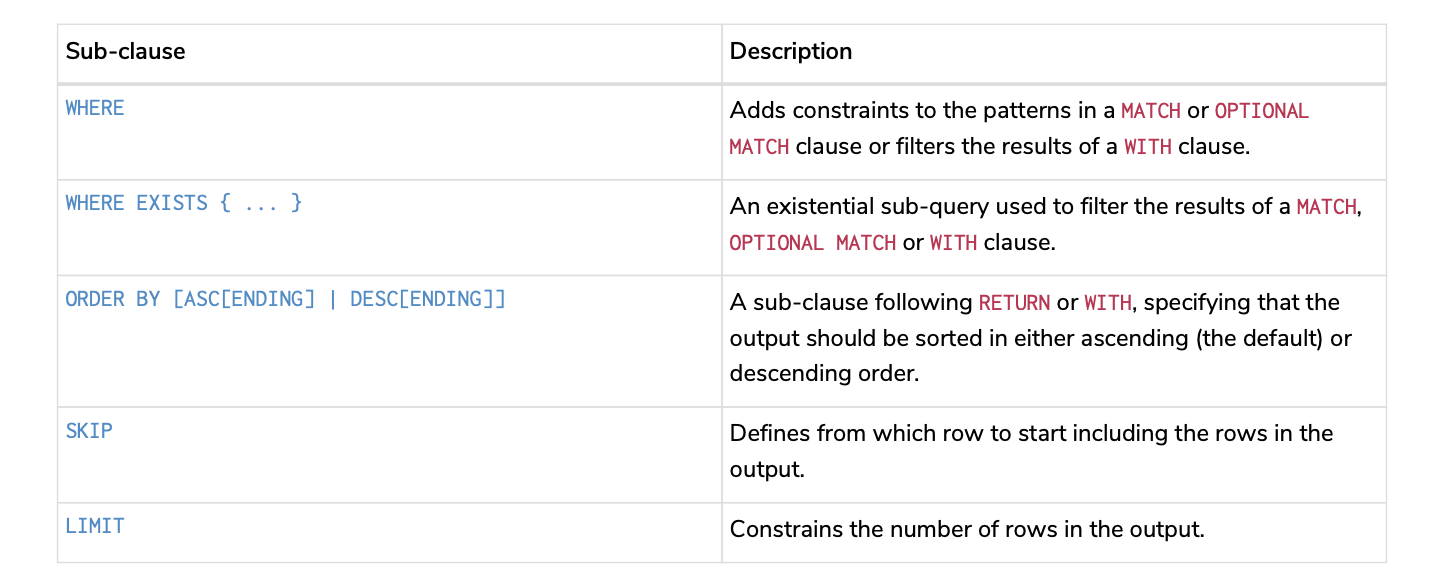



### Reading Hints
* These comprise clauses used to specify planner hints when tuning the query. 
1. USING INDEX
2. USING INDEX SEEK
3. USING SCAN
4. USING JOIN 


### WRITING CLAUSES 
* These comprise clauses for writing data to the database
1. CREATE
2. DELETE
3. DETACH DELETE
4. SET
5. REMOVE
6. FOREACH
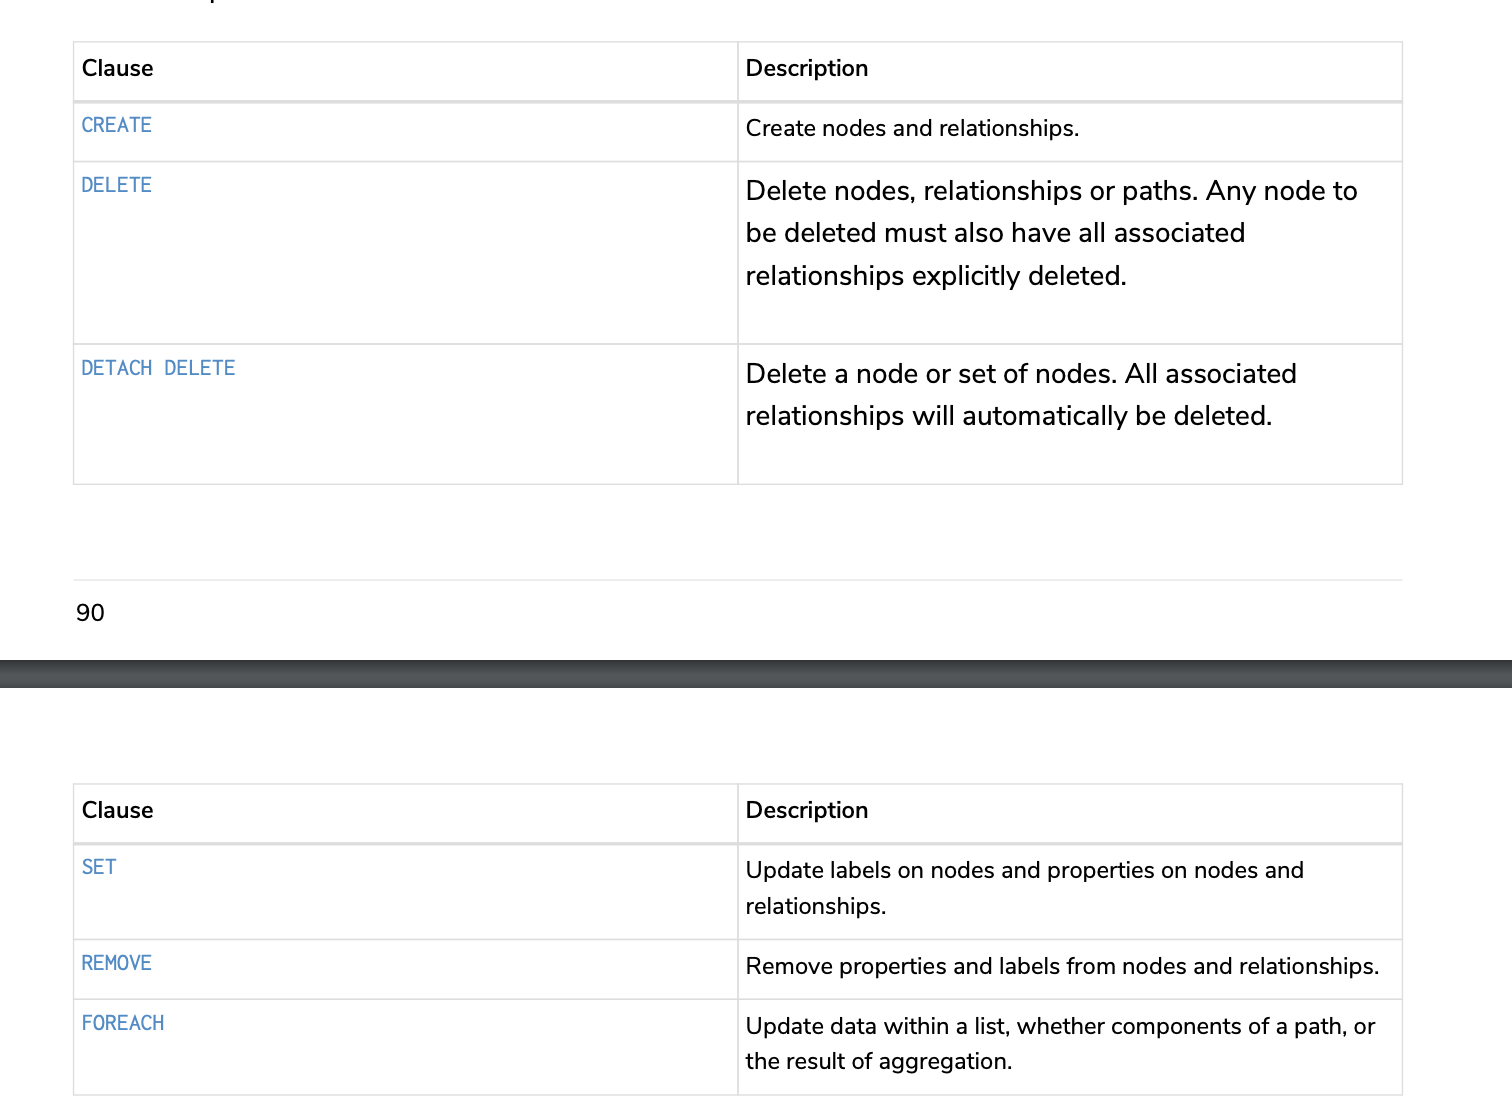



### READING/WRITING CLAUSES
* These comprise clauses that both read data from and write data to the database
1. MERGE
-- ON CREATE
-- ON MATCH
2. CALL 
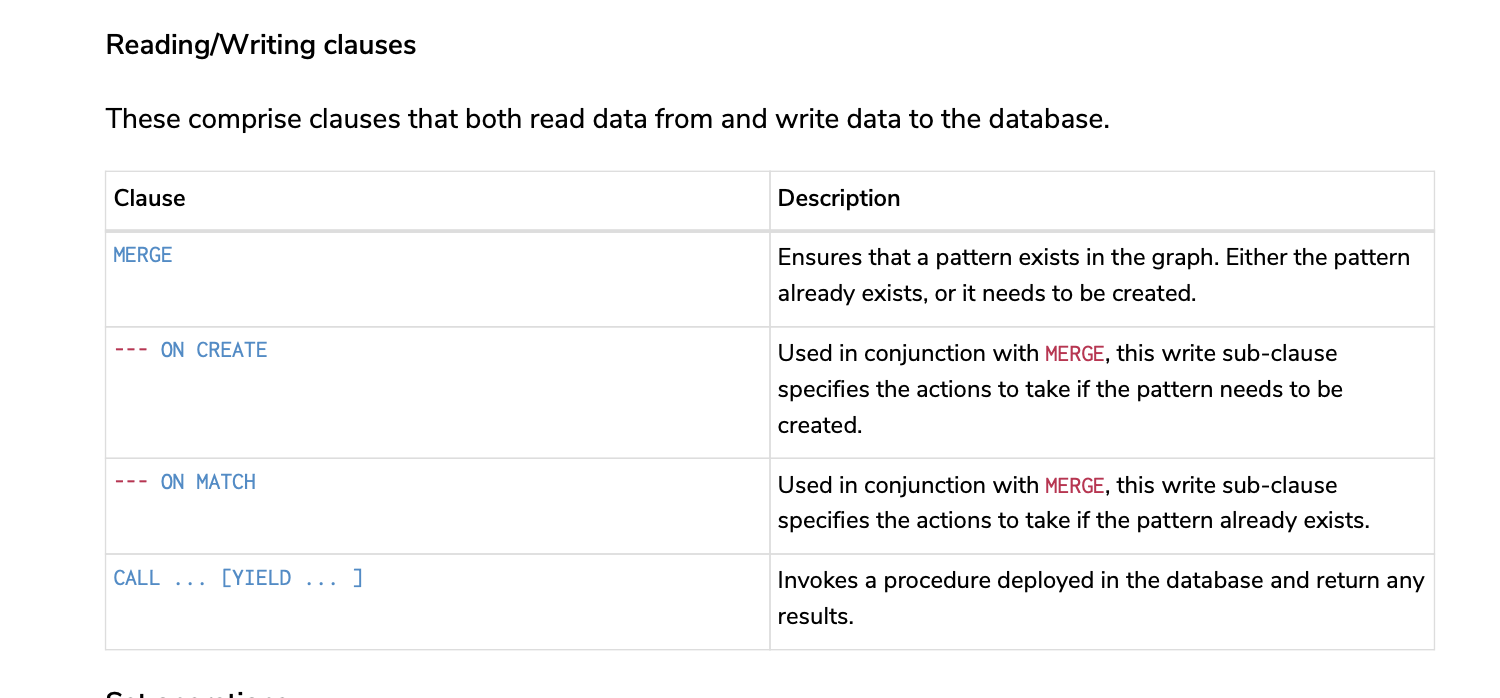


### SET OPERATIONS
1. UNION
2. UNION ALL

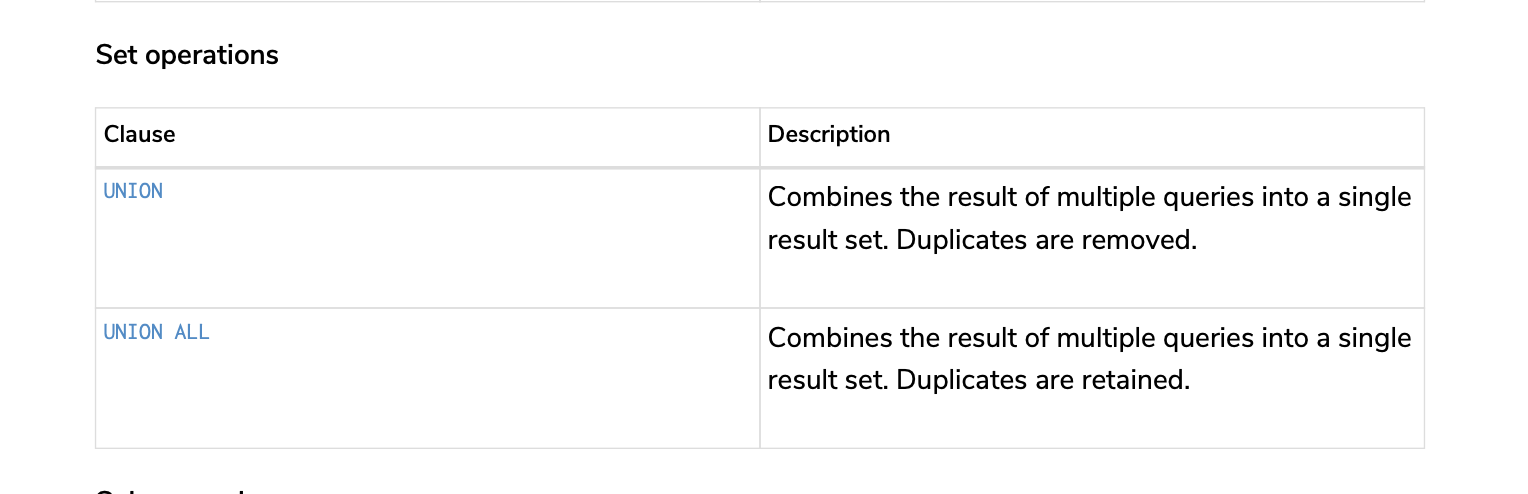





## MATCH CLAUSE

* The MATCH clause allows you to specify the patterns Neo4j will search
* This is the primary way of getting data into the current set of bindings. 
* MATCH is often couled with WHERE , which adds restrictions, or predicates, to the MATCH patterns. 
* Predicates are often part of the pattern description, and should not be considered a filter applied only after MATCHING is done. This means that WHERE should always be paired with the MATCH clause it belongs too. 


Where does MATCH occur

* At the beginning of the query
* later, possibly after a WITH clause


if it is the first clause...

* nothing will have been bound to Neo4j yet
* Neo4j will design a search to find the results matching the clause and any associated predicates specified in any WHERE part.

this could involve...

* A full database scan
* A search for Nodes with specific labels
* a search of an index to find a starting point for the pattern matching. 


#### Cypher is declarative ! So the query itself does not specify the algorithim to use to perform the search


* Predicates in WHERE can be evaluated before , during or after matching
* You can hints to force Neo4j to solve a query in a specific way (using either USING keyword or indexes)




### 3.1.2 BASIC NODE FINDING 


#### Find all nodes

```
MATCH (n) RETURN n
```


#### Get all nodes with a label 
```
MATCH (p:Person) RETURN p
```

#### Related Rows

* The symbol -- means related to, without regard to type or direction of the relationship
```
MATCH (p{firstname: 'Oliver') -- (movie) 
RETURN movie.title
```


#### Match with Labels
* to constrain your pattern with labels of nodes, you add it to your pattern with label syntax

```
MATCH(director:Person{firstname:'Oliver'} -- (movie:Movie)
RETURN movie.title

```


### Relationship basics

### Outgoing Relationships

* When the direction of a relationship of interest, it is shown by using --> or <--, like this
* The below query will return any movie nodes with an outgoing relationship from John
```
MATCH (p:Person{name:'John') --> (m:Movie) RETURN m 

```


###  Directed relationships and variable

* If a variable is required, either for filtering on properties or to be referenced later give it a variable


```
MATCH (:Person{name:'Ron'} - [p] -> (b:Building)
RETURN type(p)

```


### MATCH on relationship type

* When you know the relationship type you want to match on, you can specify it by using a colon together with the relationship type. 

```
MATCH (:Person{name:'Usain Bolt}) - [:Ran] -> (r) RETURN r 

```


### MATCH on multiple relationship types

* to match on one of multiple relationships you can chain them together

```
MATCH(p:Person{name:'Max'}) - [:BOUGHT|:RENTED] - (i) RETURN i
```



### Relationship types with uncommon Charachters 

* Sometimes your database will have types with non-letter charachters, or with spaces in them. Use backtick to quote these.

```
MATCH
(p:Person{name:'Paul'}),
(r:Person{name:'Rob'})
CREATE (r) - [`TYPE THAT HAS SPACES'] - (p)


MATCH(p:Person{name:'Paul'}) - [`TYPE WITH SPACES] -> (p)


```


### Multiple Relationships

* Relationships can be expressed by using multiple statements in the form of () -- (), or they can be strung together like this, 


```
MATCH (p:Purchase{purchaseCode:'910900861569222-4'}) - [l] - () - [:FOR_SHOP] - (s:Shop) RETURN s



```



### Variable length relationships


* Nodes that are a variable number of relationship -> node hops away can be found using the following syntax: [:TYPE*minHops..maxHops]



```
MATCH(p:Purchase{purchaseCode:'910900861569222-4'}) - [:FOR_SHOP*2] - (s:Shop) RETURN s


MATCH (ba:BankAccount) - [:SEND*2] -> (ba2) WITH ba,count(ba2) as connected_account_count, collect(ba2) as bank_accounts RETURN ba,connected_account_count, bank_accounts ORDER BY connected_account_count DESC

```



### Variable length relationships with multiple relationship types
* Variable length relationships can be combined with multiple relationship types. In this case the *minnHops..maxHops applies to all relationship types as well as any combination of them. 


```
MATCH (a:Actor{fullname: 'Charlie Sheen'}) - [:ACTS_IN|DIRECTS*2..5] - (p) 

```

### Relationship variable in variable length relationships


* When the connection between two nodes is of a variable length, the list of relationships comprising the conncetion can be returned witht he following syntax


```

MATCH p = (mt:MoneyTransfer) - [r:SEND*2] - (mt2)  RETURN relationships(p)

```


### MATCH with properties on a variable length path

* A variable length relationship with properties defined on it means that all relationships in the path must have the property set to the given value. 
* In the below query there are two paths between 'Charlie sheen' and his father ' Martin Sheen' 
* One of them includes a 'blocked' relationship and the other does not
* In this case we first alter the orgiinal graph by using the following query to add BLOCKED and UNBLOCKED relationships:


```
MATCH
(charlie:Person{name:'charlie sheen'}),
(martin:Person{name:'martin sheen'})
CREATE (charlie) - [:X {blocked:false}] -> (:UNBLOCKED) <-[:X {blocked:false}] - (martin)
CREATE (charlie)-[:X {blocked: true}]->(:BLOCKED)<-[:X {blocked: false}]-(martin)
```




### Zero length paths

* Using variable length paths that have the lower bound zero means that two variables can point to the same node. 
* If the path length between two nodes is zero, they are by definition the same node. Note that when matching zero length paths the result may contain a match even when matching on a relationship type. 



### Shortest Path

* Finding a single shortest path between nodes using shortestPath function
* Charachteristics describing the relationship like type, max hops and direction are all used
```

MATCH (c1:Character {name:'Hodor'}), (c2:Character {name:'Doran'}), p= shortestPath((c1)-[*..15]-(c2)) RETURN p
```

### Single shortest path with predicates

* Predicates used in the WHERE clause that apply to the shortest path pattern are evaluated before deciding what the shortest matching path is.


```
MATCH (c1:Character {name:'Hordor'}), (c2:Character {name:'Sansa'}), p= shortestPath((c1) - [*] - (c2)) WHERE none(r in relationships(p) WHERE type(r) = 'INTERACTS') RETURN p
```


### All shortest paths


* Finds all the shortest paths between two nodes
```
MATCH (c1:Character {name:'Hodor'}), (c2:Character {name:'Doran'}), p= allShortestPaths((c1) - [*] - (c2)) RETURN p
```




### Relationship by id


* This is not recommended

```
MATCH ()-[r]->()
WHERE id(r) = 0
RETURN r
```



### Multiple Nodes by id

* Multiple nodes are selected by specifying them in an IN clause


```
MATCH (n)
WHERE id(n) in [1,2,3,4,5,6]
RETURN n
```




## Optional Match



### Intoduction

* Matches patterns against your graph database just like MATCH does. The difference is that if no matches are found, OPTIONAL MATCH will use a null for missing parts of the PATTERN. Basically the equivalant to an OUTER JOIN in SQL
* Either the whole pattern is matched or nothing is matched. 
* WHERE is part of the pattern description, and the predicates will be considered while looking for matches, not after. This matters especially in the case of multiple (OPTIONAL) MATCH clauses. 


### Optional Relationships

* If the relationship is optional use the OPTIONAL MATCH clause.
* Similar to how a SQL outer join works. If relationship is there, is is returned, if not , null in its place



```
OPTIONAL MATCH (a:Character {name:'Ryan'}) --> (a) RETURN a
```


### Optional types and named relationship

* This returns the Charachter node robb and a null for node n

```

MATCH (a:Character {name:'Robb'}) OPTIONAL MATCH (a) - [r:FIGHTS] -> (n) RETURN a,n,r

```



## RETURN


### Other Expressions

* Any expression can be used as a return item: literals, predicates, properties, functions and everything else. 

```
MATCH (a:Character{name:'Robb'}) RETURN a, 'this is rob', (a) - [:INTERACTS] - () 
```


### Unique Results

* DISTINCT retrievels only unique rows depending on the columns that would have been output

```
MATCH (a:Character {name:'Robb'}) - [:INTERACTS*1..3] - (n:Character) RETURN DISTINCT n.name
```


## WITH

### Introduction

* With clause allows query parts to be chained together, piping the results from on to be used as starting points or criteria in the next
* you can manipulate the output before it is passed on to the following query parts
* manipulations can be in shape and # of entries in result set
* ORDER BY and LIMIT are often used in conjunction to the WITH clause to limit results. 
* also to filter on aggregate values 
* WITH is also used to seperate READ and WRITE operations
* Queries need to be either READ or WRITE only.
* switch must be made using WITH clause

### Filter & Sort on Aggregated Results

* Aggregated Results have to pass through a WITH clause to be filtered on. You can also sort results before using collect on them

```
MATCH(p:Character{name:'Tommen'}) - [:INTERACTS] - (f) - [:INTERACTS] - (fof) WITH f,count(fof) as coll WHERE coll > 5 RETURN f,coll ORDER BY coll DESC
```




## Creating nodes from list parameters

* Create a number of nodes and relationships from a parameter -list without using FOREACH



```




{
  "events" : [ {
  "year" : 2014,
  "id" : 1
  }, {
  "year" : 2014,
  "id" : 2
  } ]
}

UNWIND events AS event
MERGE (y:Year {year: event.year})
MERGE (y)<-[:IN]-(e:Event {id: event.id})
RETURN e.id AS x ORDER BY x

```



# Using path patterns in WHERE

* patterns are expressions in Cypher, expressions that return a list of paths
* list expressions are also predicates - an empty list evaluates to false, a list with elements evaluates to true
* So patterns are not only expressions but predicates. The only limitation to your pattern is that you must be able to express in in a single path. 
* you can't use commas between multiple paths like MATCH

```

MATCH
  (timothy:Person {name: 'Timothy'}),
  (other:Person)
WHERE other.name IN ['Andy', 'Peter'] AND (other)-->(timothy)
RETURN other.name, other.age

```



### Filter on Patterns using Not

* The NOT operator can be used to exclude a pattern
```

MATCH(p1:Character{name:'Aemon'}), (p2:Character) WHERE NOT (p1) - [:INTERACTS] -> (p2) RETURN p2.name

```



### Filter on relationship type

* You can put the exact relationship type in the MATCH pattern. But sometimes you want to be able to do some more advanced filtering on the type. You can use the special property type to compare the type with something else


```
MATCH (n:Person)-[r]->()
WHERE n.name='Andy' AND type(r) =~ 'K.*'
RETURN type(r), r.since
```

## Create Clause




### Creating nodes



#### Create Single Node

* Creating a single node


```
CREATE (n)
```


#### Creating a node with a label

* to create a single node with a label


```
CREATE (n:Person)

```



#### Creating a node with multiple labels

```
CREATE (n:Person:Man)

```

#### Creating a node with  labels & properties

```
CREATE (p:Person:Man {name:'Alexander',age:28})
```

#### Return a newly created node
```
CREATE (p:Person:Man {name:'Ryan',age:28}) RETURN p
```
### Create relationship between two nodes

```
CREATE (p1:Person:Man {name: 'alexander'}, (p2:Person:Man {name:'Ryan'} Return p1,p2
```

### Create node with parameters
```

```


# SET

* SET clause is used to update labels on nodes and properties on nodes and relationships.

```
CREATE (p1:Person{name:'Stefan'}),(p2:Person{name:'Andy',age:36,hungry:True}),(p3:Person{name:'Peter',age:34}),(p4:Person{name:'George'}), (p1) - [:KNOWS] -> (p2), (p2) - [:KNOWS] -> (p3), (p4) - [:KNOWS] -> (p3) 

```
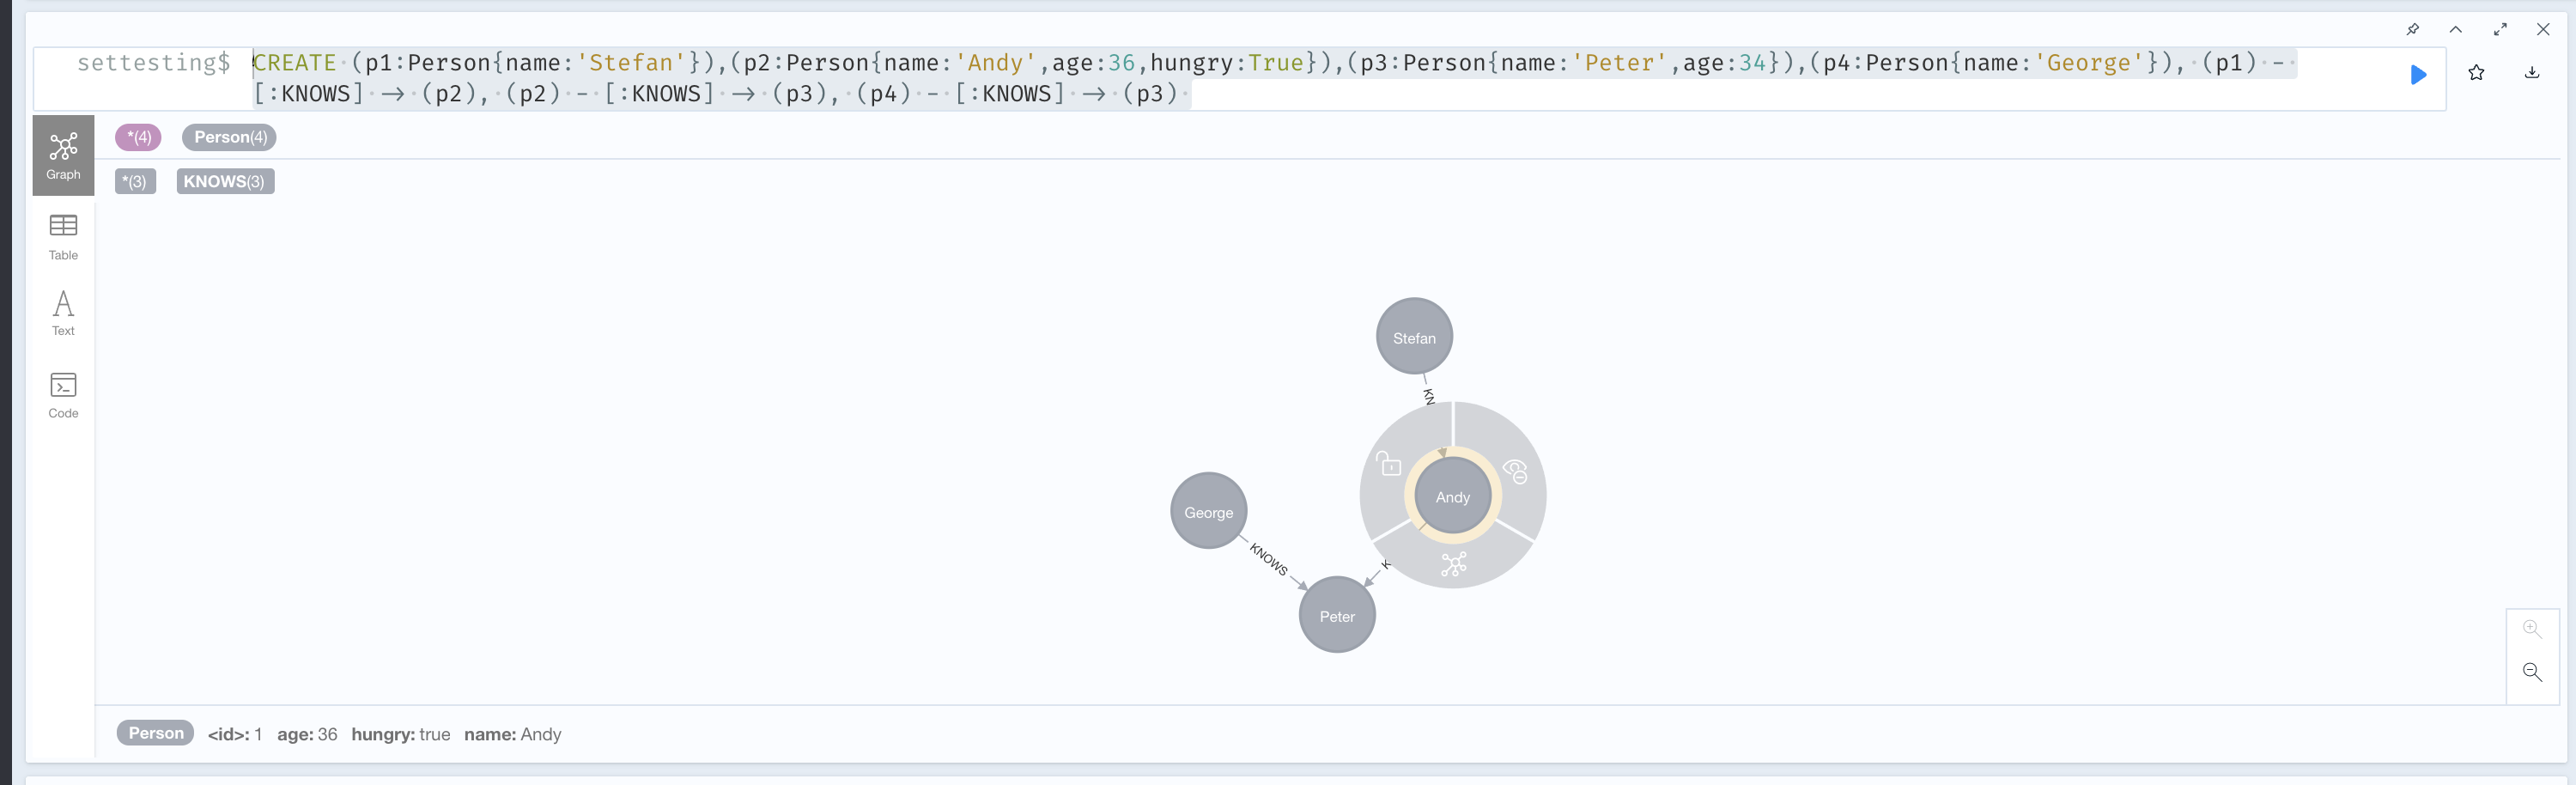


## Introduction

* can be used as a map - provided a literal, a node or a relationship , to set properties.



## Set a property

```
MATCH (n:Person{name:'Andy'}) SET n.surname = 'Taylor' RETURN n.name,n.surname
```


* It is possible to set a property on a node or relationship with a more complex expression. For instance, in contrast to specifying node directly, the following query shows gow to set a property for a node selected by an expression. 

```
MATCH (n {name: 'Andy'})
SET (CASE WHEN n.age = 36 THEN n END).worksIn= 'Malmo'
RETURN n.name,n.age , n.worksIn


```


## Update a property

* SET can be used to update a property on a node or relationship. This query forces a change of type in the age property. 

```
MATCH (n {name: 'Andy'}) 
SET n.age = toString(n.age)
RETURN n.name, n.age

```


## Remove a property

* Although REMOVE is normally used to remove a property, It's sometimes more convenient to use the SET command 

```
MATCH (n {worksIn: 'Malmo'})
SET n.worksIn = Null 
RETURN n.worksIn

```

## Copy properties between nodes and relationships

* Set can be used to copy all properties from on node or relationship to another. This will remove all properties on the node or relationship being copied to. 

```

MATCH (p1:Person{name:'George'}), (p2:Person{name:'Andy'}) SET p1 = p2 RETURN p1.name,p1.surname,p1.age,p1.hungry

```



### Replace all properties using a map and = 


* The property replacement operator , = , can be used with SET to replace all existing properties on a node or relationship with those provided by a map. 

```

MATCH (p {name: 'Alan'}) SET p = {name:'Alaine',position:'desk jockey'} RETURN p.name,p.position 
```


### Remove all properties using an empty map

* you can remove all properties on a node with SET, = and an      map

```
MATCH (n {name:'Stefan'}) SET n = {} RETURN n.name 
```

### Mutating specific properties using a map and += operator

* The property mutation operator, += can be used with sET to mutate properties from a map in a fine grained fashion. 

1. Any properties in the map that are not on the node or relation ship will be added
2. Any properties not in the map that are on the node or relationship will be left as is
* Any properties that are in both map and node/relationship will be replaced in target node,relationship. If any property is null it will be removed completely. 

```
MATCH (n:Person{name:'Larry'}) SET n += {name: 'Speed',age :43}  RETURN n.name,n.age
```


### Set a label on a node

* to set a label on a node use the following syntax:

```
MATCH (n:Person) SET n:American RETURN n.name,labels(n) 
```


### Set multiple labels on a node

```

MATCH (n {name:'Alaine'}) SET n:CostaRican:Romanian WITH n.name as name, collect(labels(n)) as labels RETURN name,labels
```